In [1]:
import h5py
import numpy as np
import torch
import PIL.Image as Image
from nsd_access import NSDAccess
import os
import os.path as op
import glob
import nibabel as nb
import numpy as np
import pandas as pd
import h5py

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from nilearn import plotting

import urllib.request, zipfile
from pycocotools.coco import COCO

from nsd_access import NSDAccess

%matplotlib inline

nsda = NSDAccess('/home/naxos2-raid25/kneel027/home/surly/raid4/kendrick-data/nsd', '/home/naxos2-raid25/kneel027/home/kneel027/nsd_local')



(1, 425, 425, 3) uint8


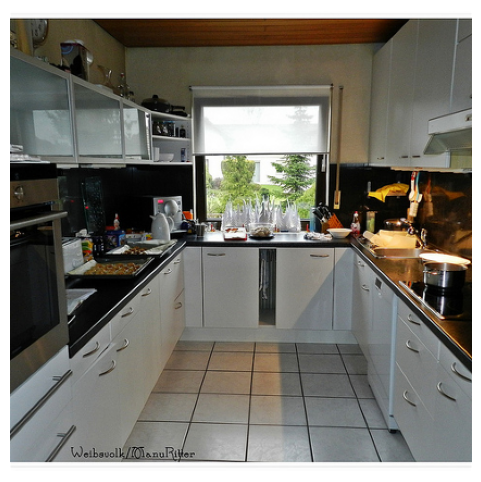

In [33]:
subj1 = nsda.stim_descriptions[(nsda.stim_descriptions['subject1'] != 0) & (nsda.stim_descriptions['shared1000'] == True)]
# subj1 = nsda.stim_descriptions[nsda.stim_descriptions['subject1'] != 0]
subj1 = subj1.sort_values(by='subject1_rep0')
i=3
# index = int(subj1.loc[(subj1['subject1_rep0'] == i) | (subj1['subject1_rep1'] == i) | (subj1['subject1_rep2'] == i)].nsdId)
index = int(subj1.iloc[i].nsdId)
# ci = nsda.read_image_coco_info([0], info_type='captions', show_annot=True)
# print(ci[index]['caption'])

img = nsda.read_images([index], show=True)
print(img.shape, img.dtype)
Image.fromarray(img[0]).save('/home/naxos2-raid25/kneel027/home/kneel027/tester_scripts/surfer.png')

In [3]:
coco_image_arr = torch.from_numpy(np.load("/home/naxos2-raid25/kneel027/home/kneel027/nsd_local/preprocessed_data/images/vector_73k.npy"))
print(coco_image_arr.shape, coco_image_arr.dtype)
coco_image_arr_np = coco_image_arr.numpy()
image1 = coco_image_arr_np[5]
Image.fromarray(image1).save('/home/naxos2-raid25/kneel027/home/kneel027/tester_scripts/coco_image1.png')


In [3]:
betas = []
for i in range(1,41):
    try:
        betas.append(nsda.read_betas(subject='subj01', 
                            session_index=i, 
                            trial_index=[], # empty list as index means get all for this session
                            data_type='betas_fithrf_GLMdenoise_RR',
                            data_format='func1pt8mm'))
    except:
        pass

print(np.concatenate(betas, axis=3).shape)

In [2]:
beta = nsda.read_betas(subject='subj01', 
                            session_index=1, 
                            trial_index=[0], # empty list as index means get all for this session
                            data_type='betas_fithrf_GLMdenoise_RR',
                            data_format='func1pt8mm')
print(beta.shape)

(81, 104, 83, 1)


In [34]:
# Also, the stimuli have info
pd.set_option('display.max_columns', None)
subj1 = nsda.stim_descriptions[(nsda.stim_descriptions['subject1']) & (nsda.stim_descriptions['shared1000'] == True)]
# subj1 = subj1.sort_values(by='subject1_rep0')
print(subj1.head())
i=25502
index = int(subj1.loc[(subj1['subject1_rep0'] == i) | (subj1['subject1_rep1'] == i) | (subj1['subject1_rep2'] == i)].nsdId)
# print(index)
# img = nsda.read_images([index], show=True)

       cocoId  cocoSplit                         cropBox      loss  nsdId   
46002  412922  train2017            (0, 0, 0.125, 0.125)  0.071429  46002  \
48617  161062  train2017              (0, 0, 0.15, 0.15)  0.000000  48617   
44980  408965  train2017            (0, 0, 0.125, 0.125)  0.000000  44980   
32625   98480  train2017            (0, 0, 0.125, 0.125)  0.076923  32625   
53052  440792  train2017  (0, 0, 0.16640625, 0.16640625)  0.000000  53052   

       flagged  BOLD5000  shared1000  subject1  subject2  subject3  subject4   
46002    False      True        True         1         1         1         1  \
48617    False      True        True         1         1         1         1   
44980    False      True        True         1         1         1         1   
32625    False      True        True         1         1         1         1   
53052    False      True        True         1         1         1         1   

       subject5  subject6  subject7  subject8  subject1_

TypeError: cannot convert the series to <class 'int'>

In [ ]:
nsda.stim_descriptions[(nsda.stim_descriptions['subject1'] != 0) & (nsda.stim_descriptions['shared1000'] == False)]

: 

In [7]:
# trial1 = subj1.loc[subj1['subject1_rep0'] == 1]
# trial2 = subj1.loc[subj1['subject1_rep1'] == 1]
# trial3 = subj1.loc[subj1['subject1_rep2'] == 1]

# trials = trial1 | trial2 | trial3
# print(trials)
val = int(subj1.loc[(subj1['subject1_rep0'] == 3000) | (subj1['subject1_rep1'] == 3000) | (subj1['subject1_rep2'] == 3000)].nsdId)
print(val)
# print(val)

45413


In [8]:
img = nsda.read_images([1], show=False)
img.type()

AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [11]:
laion_duplicates = pd.read_csv('duplicate_LAION5B.csv')
coco_ids_duplicate = laion_duplicates['remove'].tolist()
coco_ids_duplicate = [int(x) for x in coco_ids_duplicate if x != "FALSE"]
print(len(coco_ids_duplicate))
print(coco_ids_duplicate)

67
[412922, 161062, 440792, 538822, 573337, 514563, 122776, 74390, 423488, 322008, 74714, 275663, 539395, 302588, 561677, 146256, 70421, 57631, 364806, 424110, 228565, 306249, 366146, 135316, 115649, 385417, 191686, 23392, 318381, 443575, 81105, 252160, 504888, 444880, 233873, 425712, 515102, 553586, 350299, 119669, 122923, 176728, 458178, 575164, 40187, 567837, 9987, 136111, 436578, 19863, 359687, 210065, 459190, 361648, 283678, 167908, 244334, 352724, 152273, 138785, 435902, 480990, 304187, 8027, 277778, 296474, 278714]


In [27]:
subj_test = nsda.stim_descriptions[(nsda.stim_descriptions['subject1'] != 0) & (nsda.stim_descriptions['shared1000'] == True)]
sample_count = 0
index_list = []
duplicates = []
for i in range(subj_test.shape[0]):
    cocoId = subj_test.iloc[i]['cocoId']
    if cocoId in coco_ids_duplicate:
        duplicates.append(True)
        print(i)
    else:
        duplicates.append(False)
    
    heldout = True
    for j in range(3):
        scanId = subj_test.iloc[i]['subject{}_rep{}'.format(1, j)]
        if scanId < 27750:
            heldout = False
    if heldout == False:
        index_list.append(sample_count)
        sample_count += 1
    else:
        index_list.append(-1)
print(sample_count)
print(duplicates)

50
73
79
81
91
109
117
128
152
193
203
210
214
229
261
266
275
277
282
321
346
348
369
399
406
412
423
441
453
487
497
498
510
555
559
571
608
609
625
633
665
669
671
676
705
709
719
726
738
777
796
800
826
842
854
863
867
870
877
886
909
932
953
964
990
991
993
982
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa

In [32]:
def make_test_indices(indices):
    converted_indices = []
    for i in indices:
        if duplicates[i] == False and index_list[i] != -1:
            converted_indices.append(index_list[i])
    return converted_indices
init_indices = [i for i in range(20,1000)]
test_indices = make_test_indices(init_indices)
print(len(test_indices))
# print(test_indices)
split1 = 299
split2 = 598
testset1 = test_indices[:split1]
testset2 = test_indices[split1:split2]
testset3 = test_indices[split2:]
print(len(testset1), len(testset2), len(testset3))
print(testset1)
print(testset2)
print(testset3)

897
299 299 299
[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 188, 189, 190, 191, 192, 193, 194, 195, 196, 198, 199, 200, 201, 202, 203, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244,

In [17]:
test_samples = []
for i in range(subj_test.shape[0]):
    cocoId = subj_test.iloc[i]['cocoId']
    if cocoId not in coco_ids_duplicate:
        test_samples.append(i)
print(len(test_samples))

933


In [11]:
def convert_indices(indices):
    converted_indices = []
    for i in indices:
        converted_indices.append(index_list[i])
    return converted_indices

orig_indices = [2, 7, 8, 10, 22, 28, 44, 63, 80, 94, 108, 115, 119, 126, 127, 165, 175, 191, 215, 216, 221, 231, 239, 261, 271, 331, 348, 357, 401, 408, 419, 421, 434, 446, 449, 458, 473, 474, 486, 494, 495, 507, 510, 511, 526, 528, 532, 540, 556, 589, 617, 619, 622, 626, 701, 749, 755, 791, 792, 794, 855, 892, 900, 905, 909, 934, 940, 946, 964, 978, 982, 988]
new_indices = convert_indices(orig_indices)
print(new_indices)
print(convert_indices([200]))

[2, 7, 8, 10, 22, 28, 44, 61, 77, 90, 104, 110, 114, 121, 122, 159, 169, 185, 209, 210, 215, 225, 233, 255, 265, 325, 342, 351, 394, 401, 412, 414, 427, 439, 442, 451, 466, 467, 479, 487, 488, 500, 503, 504, 517, 519, 523, 531, 547, 579, 607, 609, 612, 616, 689, 735, 740, 776, 777, 779, 838, 874, 882, 887, 891, 916, 922, 928, 946, 960, 964, 970]
[194]
